In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
import requests
import datetime
import time
import warnings
%matplotlib inline 
#to display plot directly in notebook
warnings.filterwarnings('ignore')
#to suppress all warning
pd.options.display.float_format = '{:.4f}'.format 
#to round of upto 4 decimal places
plt.style.use("seaborn-v0_8")

In [11]:
symbols = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'LT.NS', 'KOTAKBANK.NS', 
    'SBIN.NS', 'ITC.NS', 'AXISBANK.NS', 'BHARTIARTL.NS', 'HINDUNILVR.NS', 'MARUTI.NS', 'BAJFINANCE.NS', 
    'WIPRO.NS', 'ASIANPAINT.NS', 'M&M.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'TECHM.NS', 'DRREDDY.NS', 
    'NESTLEIND.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 'TITAN.NS', 'BAJAJ-AUTO.NS', 'HCLTECH.NS', 
    'COALINDIA.NS', 'ONGC.NS', 'IOC.NS', 'DIVISLAB.NS', 'SHREECEM.NS', 'NTPC.NS', 'TATACONSUM.NS',
    'HINDALCO.NS', 'BPCL.NS', 'HEROMOTOCO.NS', 'GRASIM.NS', 'INDUSINDBK.NS', 'ADANIPORTS.NS', 
    'BAJAJFINSV.NS', 'JSWSTEEL.NS', 'CIPLA.NS', 'EICHERMOT.NS', 'UPL.NS', 'SBILIFE.NS', 'HINDPETRO.NS', 
    'TATAMOTORS.NS'
]
## picking compines from nifty 50 
##(except HDFC ltd and Shriram Transport Finance Co. Ltd 
##because there data where missing in year time frame)

In [12]:
df1 = yf.download(symbols, start = "2014-04-13",end = 
                "2024-04-10")
df1

[*********************100%%**********************]  48 of 48 completed


Price          Adj Close                                          \
Ticker     ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                               
2014-04-15      176.7830      492.0765    276.8633     1513.7252   
2014-04-16      183.4951      492.4450    274.3250     1510.8179   
2014-04-17      187.5601      500.5924    280.5894     1522.5231   
2014-04-21      192.8542      496.4035    288.0896     1521.0884   
2014-04-22      193.6105      493.8257    287.3807     1512.9324   
...                  ...           ...         ...           ...   
2024-04-03     1391.2308     2841.8538   1062.4301     9007.2461   
2024-04-04     1361.0106     2890.3345   1062.1302     9072.4160   
2024-04-05     1369.6735     2855.8184   1058.2832     8936.8672   
2024-04-08     1342.8884     2864.2864   1075.2202     8957.6982   
2024-04-09     1350.7048     2829.7703   1079.1671     8906.5146   

Price                                                                    \
Ticker     BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS  BPCL.NS  CIPLA.NS   
Date                                                                      
2014-04-15       76.5094      169.2990      275.8702  40.8036  376.3068   
2014-04-16       77.4277      170.7390      274.5556  39.9476  372.7847   
2014-04-17       77.8000      170.2092      276.1247  41.1790  376.3538   
2014-04-21       78.7332      170.3778      283.9704  42.4652  375.5085   
2014-04-22       79.1999      170.0118      284.3521  44.2001  372.4090   
...                  ...           ...           ...      ...       ...   
2024-04-03     1639.3158     7272.7397     1218.9072 295.9938 1459.1281   
2024-04-04     1654.7561     7247.0190     1200.1617 289.9620 1447.2786   
2024-04-05     1676.8920     7139.8071     1184.3995 286.0620 1437.2139   
2024-04-08     1688.0850     7142.6924     1198.0236 286.7887 1450.1541   
2024-04-09     1709.3217     7157.6675     1197.7750 283.7849 1438.1063   

Price                    ...       Volume                              \
Ticker     COALINDIA.NS  ... SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS   
Date                     ...                                            
2014-04-15     132.3403  ...      2743702       1464343       6939177   
2014-04-16     130.9392  ...      1792061       1148162       3823079   
2014-04-17     131.4816  ...      2033985       4644106       4626464   
2014-04-21     133.8319  ...      1324788       2939902       2848869   
2014-04-22     135.1426  ...      1194987       2243023       2514731   
...                 ...  ...          ...           ...           ...   
2024-04-03     441.0865  ...      2098379       1133287       8040366   
2024-04-04     444.4033  ...      2439461       2403608       9138276   
2024-04-05     442.5221  ...      1548980        627856       4519120   
2024-04-08     442.9677  ...      1170390       1833218       5188052   
2024-04-09     435.4925  ...      1389391       1184800       8539041   

Price                                                                      \
Ticker     TATASTEEL.NS   TCS.NS TECHM.NS TITAN.NS ULTRACEMCO.NS   UPL.NS   
Date                                                                        
2014-04-15     48916277  3597244  5604608   667585        111024  5043801   
2014-04-16     42785464  3475910  3022520   580798        177450  3374191   
2014-04-17     34439863  7681438  2343092   426231        207383  2886861   
2014-04-21     39727736  1842594  2115596   785424        112577  2108034   
2014-04-22     34292509  1486274  2232556   931899        159728  2216427   
...                 ...      ...      ...      ...           ...      ...   
2024-04-03     50938559  3973090  1819093   801601        481855  4788697   
2024-04-04     61094750  3394637  2460669  1177617        346378  9778795   
2024-04-05     44668121  1636819  1184658   623873        280079  6753966   
2024-04-08     48255703  2302538   686932   84926

In [13]:
df=df1.Close.copy()

In [14]:
df.head()

Ticker,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,CIPLA.NS,COALINDIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-15,187.0000,534.5000,289.0400,2004.4000,77.0650,175.7750,293.1339,74.2833,400.6500,292.8000,...,616.4000,153.0500,407.5783,38.9812,1126.3750,441.0500,257.4000,2212.1499,147.3667,220.7063
2014-04-16,194.1000,534.9000,286.3900,2000.5500,77.9900,177.2700,291.7370,72.7250,396.9000,289.7000,...,613.8500,150.5000,406.7868,39.4147,1098.1500,437.6500,255.6500,2200.0000,142.8667,214.5376
2014-04-17,198.4000,543.7500,292.9300,2016.0500,78.3650,176.7200,293.4043,74.9667,400.7000,290.9000,...,625.0500,157.4500,424.5463,39.9101,1111.4500,442.9500,257.2000,2217.6001,143.3333,219.6938
2014-04-21,204.0000,539.2000,300.7600,2014.1500,79.3050,176.8950,301.7409,77.3083,399.8000,296.1000,...,621.2500,156.1500,427.5145,40.3484,1110.8750,443.5000,259.4500,2219.2500,146.0667,204.8251
2014-04-22,204.8000,536.4000,300.0200,2003.3500,79.7750,176.5150,302.1465,80.4667,396.5000,299.0000,...,619.9500,157.8500,424.2495,40.0959,1110.5250,443.4250,261.2500,2202.1001,145.6667,198.9563


# EDA(Exploratory data analysis)

In [15]:
df.dtypes

Ticker
ADANIPORTS.NS    float64
ASIANPAINT.NS    float64
AXISBANK.NS      float64
BAJAJ-AUTO.NS    float64
BAJAJFINSV.NS    float64
BAJFINANCE.NS    float64
BHARTIARTL.NS    float64
BPCL.NS          float64
CIPLA.NS         float64
COALINDIA.NS     float64
DIVISLAB.NS      float64
DRREDDY.NS       float64
EICHERMOT.NS     float64
GRASIM.NS        float64
HCLTECH.NS       float64
HDFCBANK.NS      float64
HEROMOTOCO.NS    float64
HINDALCO.NS      float64
HINDPETRO.NS     float64
HINDUNILVR.NS    float64
ICICIBANK.NS     float64
INDUSINDBK.NS    float64
INFY.NS          float64
IOC.NS           float64
ITC.NS           float64
JSWSTEEL.NS      float64
KOTAKBANK.NS     float64
LT.NS            float64
M&M.NS           float64
MARUTI.NS        float64
NESTLEIND.NS     float64
NTPC.NS          float64
ONGC.NS          float64
POWERGRID.NS     float64
RELIANCE.NS      float64
SBILIFE.NS       float64
SBIN.NS          float64
SHREECEM.NS      float64
SUNPHARMA.NS     float64
TATACONSUM.NS    f

In [16]:
df.describe()

Ticker,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,CIPLA.NS,COALINDIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,...,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000,2462.0000
mean,481.4947,1804.0328,637.0835,3255.5988,777.2390,3385.6014,492.5639,186.8230,727.5241,257.3191,...,732.7151,413.2768,384.6832,66.8702,2200.5836,796.0039,1293.2721,4872.7111,512.6395,308.0753
std,244.2659,942.9988,183.6253,1113.3131,544.3982,2564.4809,221.7792,43.8622,242.7296,82.4216,...,244.4539,296.0200,171.8823,36.7916,951.0314,319.5295,966.5952,1967.0138,166.5653,134.1228
min,171.5500,497.6000,286.3900,1866.4000,77.0650,173.5650,257.1738,72.7250,372.4500,110.5500,...,324.5000,102.6500,65.3000,19.1881,1018.3500,376.3000,254.8500,1968.9000,142.8667,162.3500
25%,313.4625,1010.8500,500.4125,2618.0125,296.4537,986.2263,322.2445,158.6813,554.4375,192.4125,...,525.4125,154.4000,266.7250,37.7820,1272.6437,526.8125,405.7750,3438.4749,400.5125,208.3172
50%,375.8250,1412.7750,594.0500,2930.7000,618.9575,2697.2500,378.6561,186.2250,635.4000,256.8750,...,722.5000,271.4000,410.4243,52.2675,2016.4500,703.5250,975.5000,4120.0750,507.8667,243.6875
75%,706.8875,2854.3376,748.0875,3652.7625,1284.5399,5983.8126,671.8625,217.1375,914.4250,317.5375,...,878.7750,721.9125,479.7418,105.7000,3210.5125,1032.8625,2089.1500,6566.5249,631.1500,401.5250
max,1404.1500,3576.3000,1136.9500,9276.0996,1907.6550,8168.5498,1236.1000,328.8000,1504.1000,480.0000,...,1629.2500,1261.5500,1039.3000,166.0000,4219.2500,1806.1000,3866.6499,10503.0498,853.5500,721.5000


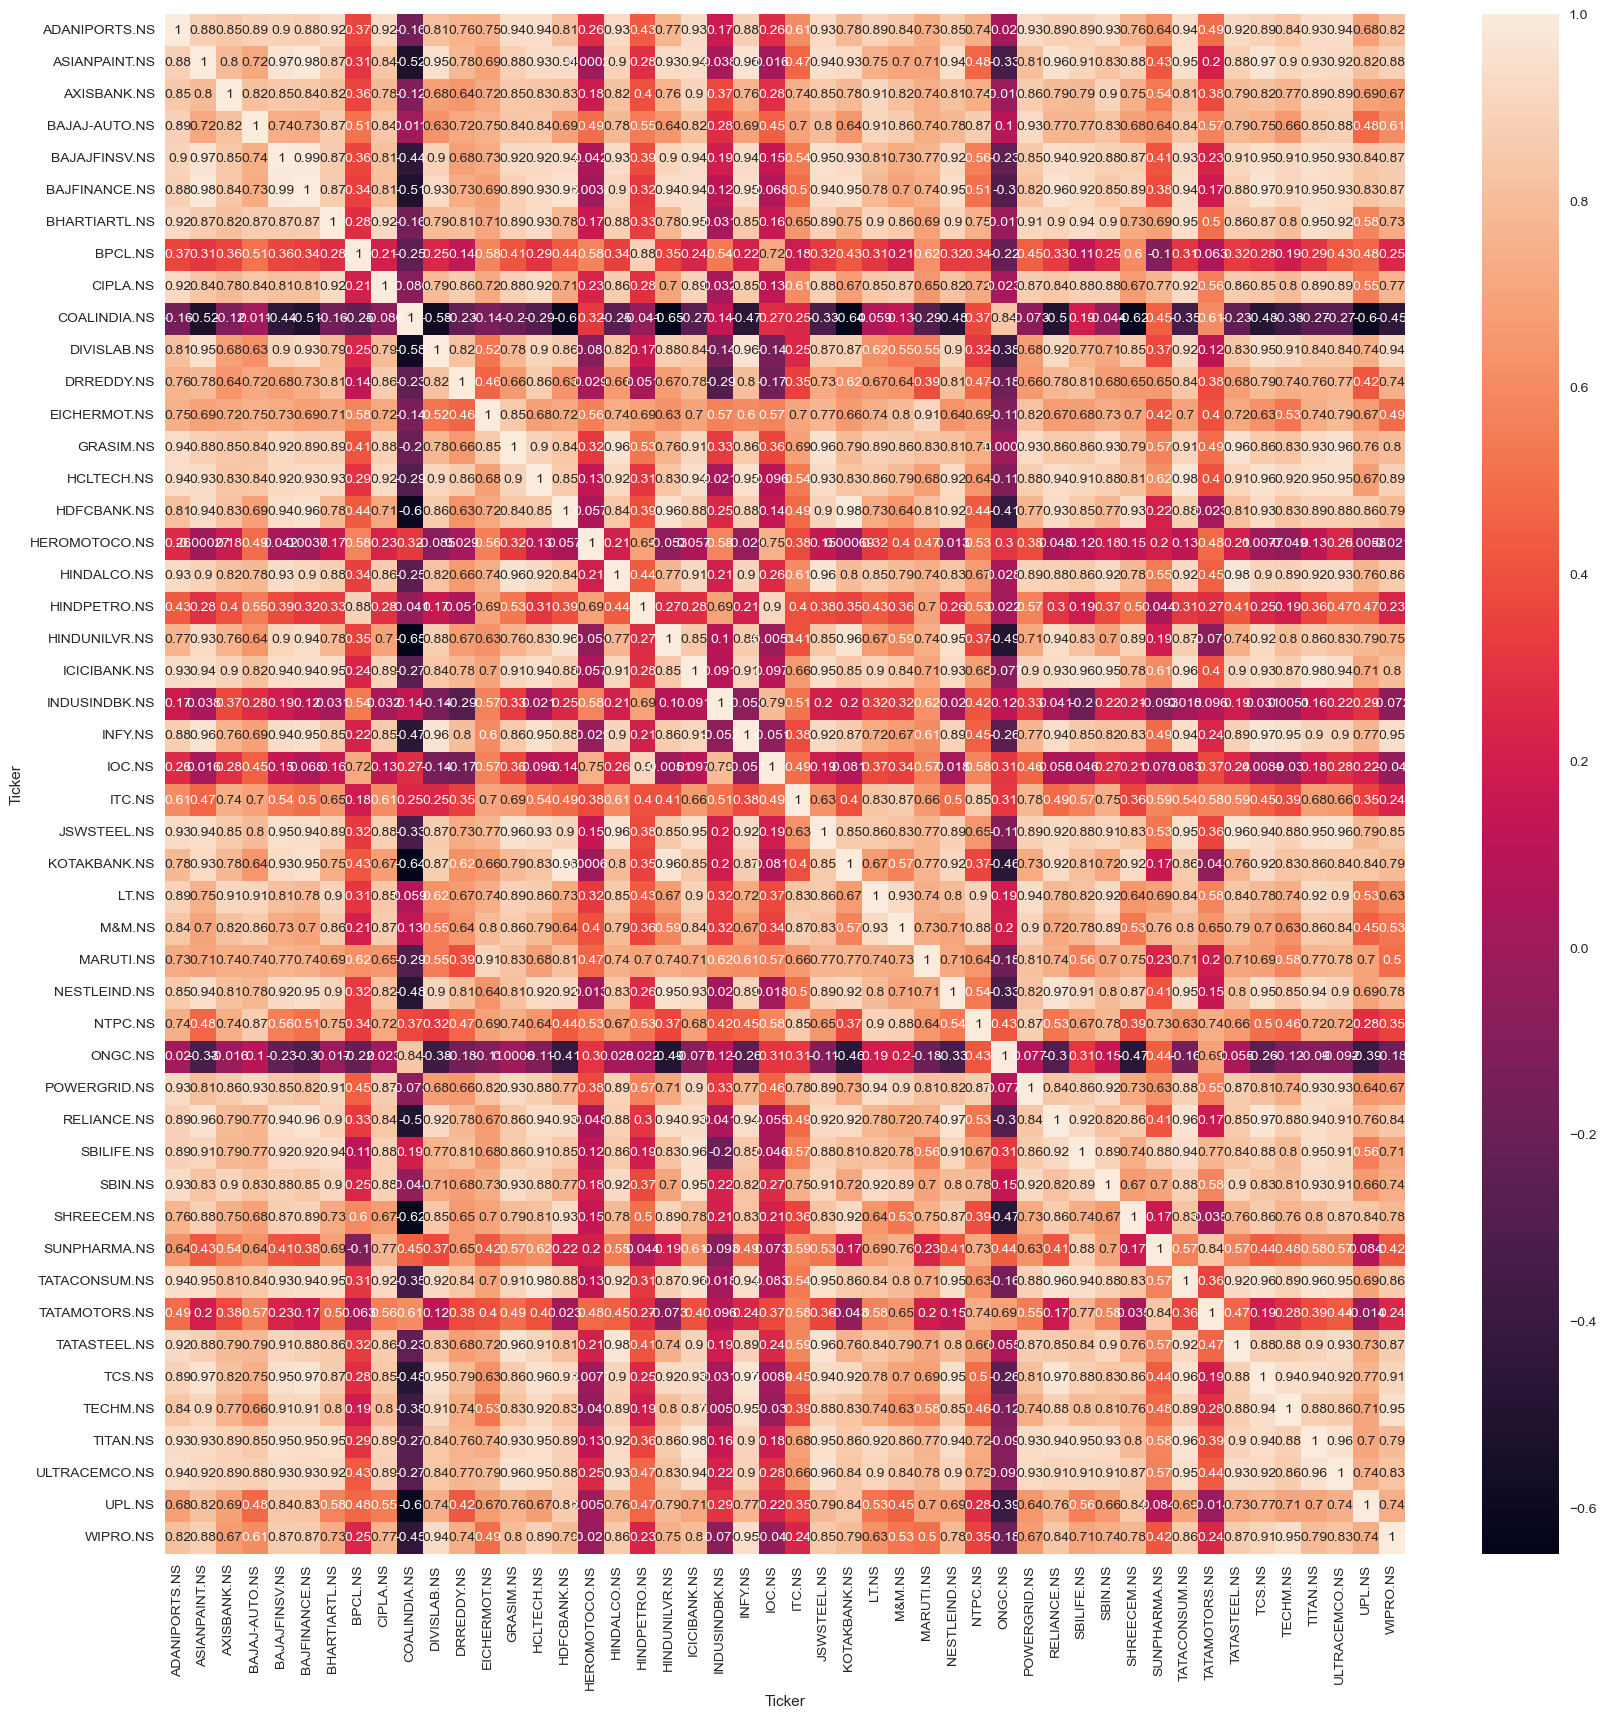

In [17]:
df_corr=df.corr(method='pearson') ## calculating correaltion using pearson method
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True)
plt.show()

In [18]:
df.isnull().sum() ## finding total number of null value in df

Ticker
ADANIPORTS.NS      0
ASIANPAINT.NS      0
AXISBANK.NS        0
BAJAJ-AUTO.NS      0
BAJAJFINSV.NS      0
BAJFINANCE.NS      0
BHARTIARTL.NS      0
BPCL.NS            0
CIPLA.NS           0
COALINDIA.NS       0
DIVISLAB.NS        0
DRREDDY.NS         0
EICHERMOT.NS       0
GRASIM.NS          0
HCLTECH.NS         0
HDFCBANK.NS        0
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDPETRO.NS       0
HINDUNILVR.NS      0
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFY.NS            0
IOC.NS             0
ITC.NS             0
JSWSTEEL.NS        0
KOTAKBANK.NS       0
LT.NS              0
M&M.NS             0
MARUTI.NS          0
NESTLEIND.NS       0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBILIFE.NS       852
SBIN.NS            0
SHREECEM.NS        0
SUNPHARMA.NS       0
TATACONSUM.NS      0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
TITAN.NS           0
ULTRACEMCO.NS      0
UPL.NS             0
WIPRO.

In [19]:
df.fillna('bfill',inplace=True) ##instead of backfilling i used interpolation as i needed previous data

In [20]:
df.isnull().sum()

Ticker
ADANIPORTS.NS    0
ASIANPAINT.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJAJFINSV.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BPCL.NS          0
CIPLA.NS         0
COALINDIA.NS     0
DIVISLAB.NS      0
DRREDDY.NS       0
EICHERMOT.NS     0
GRASIM.NS        0
HCLTECH.NS       0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFY.NS          0
IOC.NS           0
ITC.NS           0
JSWSTEEL.NS      0
KOTAKBANK.NS     0
LT.NS            0
M&M.NS           0
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBILIFE.NS       0
SBIN.NS          0
SHREECEM.NS      0
SUNPHARMA.NS     0
TATACONSUM.NS    0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
TITAN.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
WIPRO.NS         0
dtype: int64

In [21]:
df = df.apply(pd.to_numeric, errors='coerce')
df_lag = df.shift(1).copy()

# Fill missing values in df_lag
df_lag.fillna(method='bfill', inplace=True)

# Calculate log returns
data_log_returns = np.log(df / df_lag)

# Calculate daily linear returns (%)
data_returns = df.pct_change(1)
#Removing Outliers beyong 3 standard deviation
data_returns = data_returns[data_returns.apply(lambda x: (x - x.mean()).abs() < (3 * x.std())).all(1)]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_returns) # Rescaling of data based on its mean and standard deviation
rescaled_data = pd.DataFrame(scaler.fit_transform(data_returns),columns = data_returns.columns, index = data_returns.index)

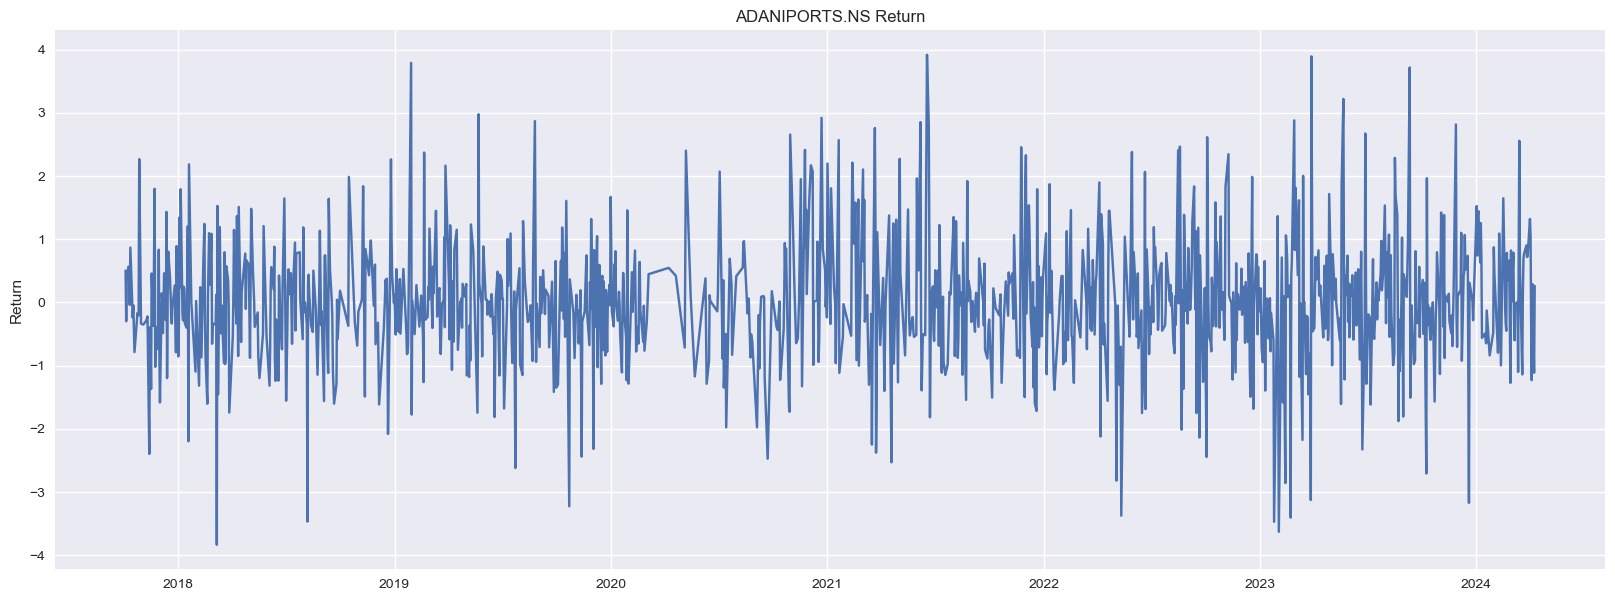

In [23]:
plt.figure(figsize=(20, 7))
plt.plot(rescaled_data['ADANIPORTS.NS'])
plt.title("ADANIPORTS.NS Return")
plt.ylabel("Return")
plt.show() # visualising return of ADANIPORTS 

# Separating Training and testing Data

In [24]:
X_train= rescaled_data[:int(len(rescaled_data) * 0.6)]
X_test= rescaled_data[int(len(rescaled_data) * 0.6):]
X_train_raw= data_returns[:int(len(rescaled_data) * 0.6)]
X_test_raw= data_returns[int(len(rescaled_data) * 0.6):]
stock_tickers = rescaled_data.columns.values
n_tickers=len(stock_tickers)

In [25]:
stock_tickers

array(['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS',
       'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS',
       'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS',
       'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',
       'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS',
       'WIPRO.NS'], dtype=object)

# Applying PCA

In [26]:
from sklearn.decomposition import PCA
pca=PCA()


In [27]:
pca.fit_transform(X_train)

array([[-1.52735148, -0.75062964,  0.94869039, ...,  0.39666476,
        -0.0266428 , -0.12039314],
       [ 1.10895437,  0.26206841,  0.14015647, ...,  0.19528902,
         0.13513143,  0.21480471],
       [-4.93868857, -0.47466698,  1.9165238 , ...,  0.35414994,
        -0.23028236,  0.26083426],
       ...,
       [-4.82511321, -2.48716593,  1.95335097, ..., -0.31299429,
        -0.14119716, -0.29532433],
       [-5.20793412, -0.53241317, -0.34204028, ...,  0.76803072,
        -0.56231029, -0.05483938],
       [-3.44995638, -0.14475514,  1.78355671, ..., -0.09520147,
        -0.78576021,  0.54393055]])

In [28]:
pca.components_[0]

array([-0.14996867, -0.12552559, -0.19016443, -0.13942368, -0.17178431,
       -0.17333683, -0.12394634, -0.15018871, -0.08835651, -0.13437237,
       -0.11655505, -0.09310985, -0.13443608, -0.17718832, -0.07728744,
       -0.1398006 , -0.13064896, -0.18198755, -0.14088823, -0.10415592,
       -0.20779125, -0.15143322, -0.08265326, -0.16298138, -0.13550724,
       -0.18404416, -0.13716953, -0.18280144, -0.14932505, -0.15439209,
       -0.09803621, -0.13477426, -0.14368094, -0.09699399, -0.14547059,
       -0.09455574, -0.21165792, -0.13219188, -0.13772755, -0.13576539,
       -0.18920688, -0.19247402, -0.06788142, -0.0978993 , -0.13798709,
       -0.17085945, -0.14922283, -0.09715021])

In [29]:
pca.explained_variance_ratio_

array([0.22131888, 0.05340024, 0.04510692, 0.03919893, 0.03447582,
       0.02921796, 0.02759509, 0.02663433, 0.024715  , 0.02334918,
       0.02124718, 0.02089144, 0.02030825, 0.01928472, 0.0189733 ,
       0.01814762, 0.0173049 , 0.01694441, 0.01658327, 0.01606673,
       0.01511658, 0.01488531, 0.0144425 , 0.01435728, 0.01401428,
       0.01335257, 0.01294466, 0.01274628, 0.0120975 , 0.01192259,
       0.0114737 , 0.01121767, 0.01067853, 0.01062922, 0.01045484,
       0.00994607, 0.00952082, 0.00925426, 0.0086528 , 0.00836016,
       0.00792583, 0.00785231, 0.00745021, 0.0071054 , 0.00620384,
       0.00583455, 0.00544488, 0.00535124])

,Explained Variance in %
0,22.1319
1,27.4719
2,31.9826
3,35.9025
4,39.3501
5,42.2719
6,45.0314
7,47.6948
8,50.1663
9,52.5012


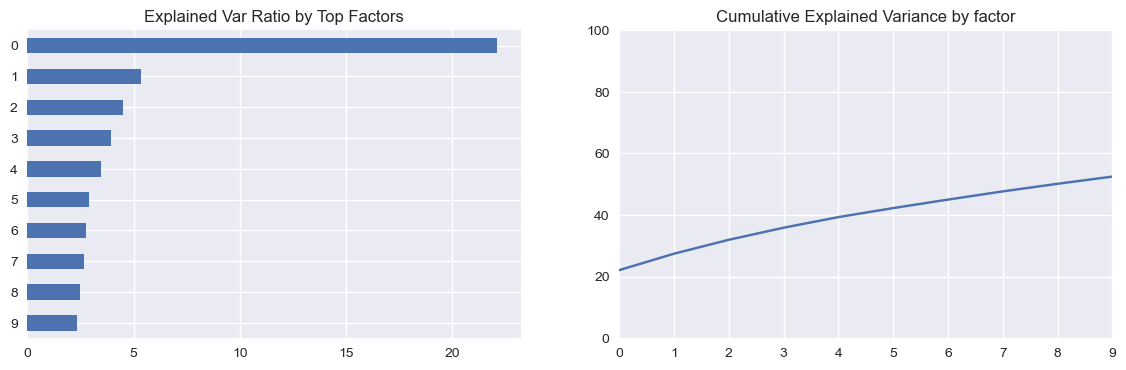

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
series1=pd.Series(pca.explained_variance_ratio_[:10]).sort_values()*100 # explained varies ratio of top 10 principal component 
series2=pd.Series(pca.explained_variance_ratio_[:10]).cumsum()*100 # commulative

Cumm_Var=pd.DataFrame()
Cumm_Var['Explained Variance in %']=pd.DataFrame(series2)

series1.plot.barh(title='Explained Var Ratio by Top Factors',ax=axes[0])
series2.plot(ylim=(0,100),xlim=(0,9),title='Cumulative Explained Variance by factor',ax=axes[1])

Cumm_Var

# Calculating Weights

In [31]:
def PCWeights():
    weights= pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)]=pca.components_[i]/sum(pca.components_[i])
    weights = weights.values.T
    return weights
        
weights=PCWeights()
weights

array([[ 2.23009701e-02,  1.86661824e-02,  2.82782492e-02, ...,
         2.54075175e-02,  2.21900609e-02,  1.44466434e-02],
       [ 7.67747303e-03,  7.05304615e-02, -1.14886372e-01, ...,
        -2.14074310e-02,  1.51404719e-02,  2.25679745e-01],
       [ 3.46972662e-02, -2.28894923e-01, -3.39893419e-01, ...,
        -1.20063815e-01,  1.25190557e-01,  2.95197795e-01],
       ...,
       [-1.99082629e+00,  3.81868950e+00, -5.16442723e-01, ...,
        -9.57178807e+00,  1.94729102e+00,  3.66812244e+00],
       [-6.68869758e-01, -3.82070192e-01, -5.70780932e-01, ...,
        -3.33096539e-01, -1.79156122e-01,  5.67960145e-01],
       [-5.67210244e-02,  1.90158998e-01,  8.17133947e-01, ...,
         7.83492315e-01,  1.23944877e-01,  4.97995148e-01]])

array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 4'}, xlabel='Ticker'>]],
      dtype=object)

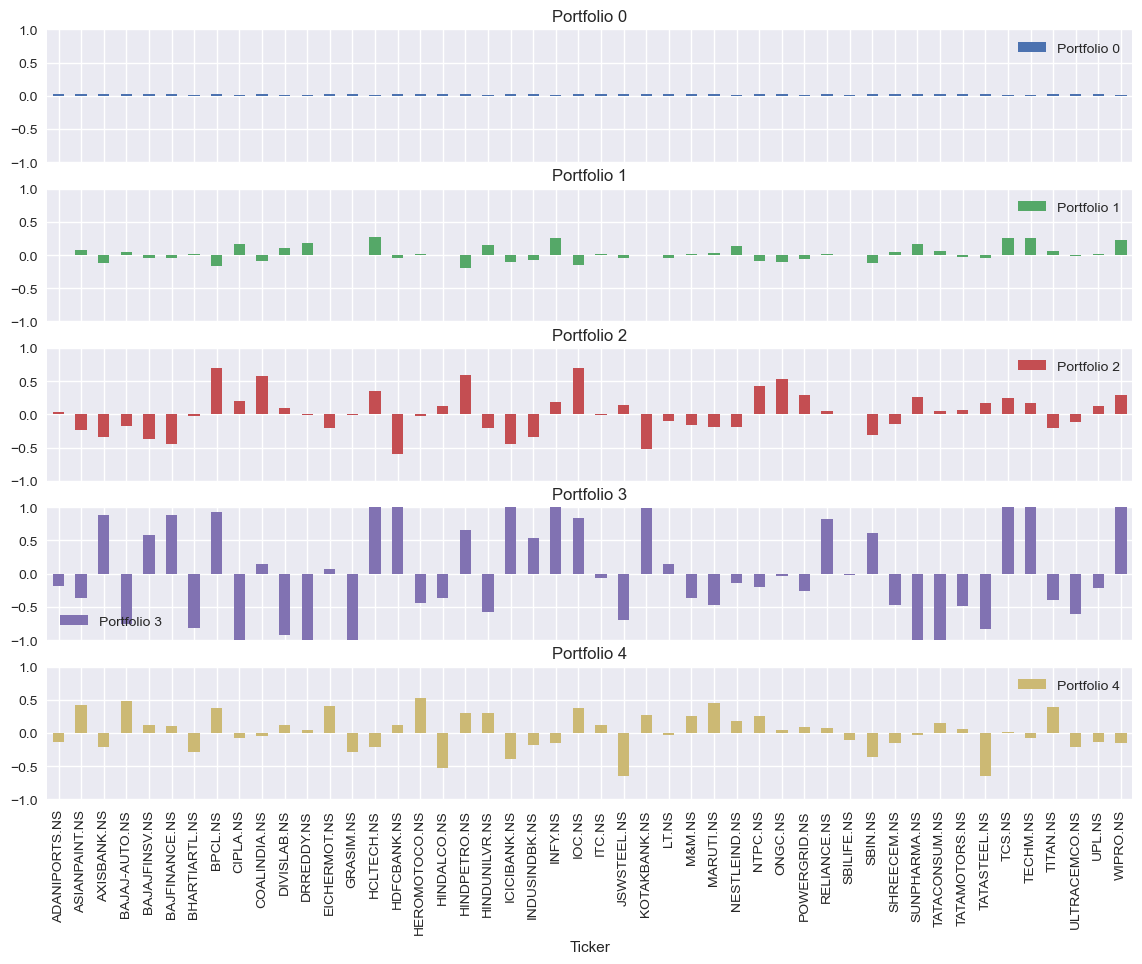

In [32]:
top_Comp=5  # making portfolio by taking upto 5 principal component
        
topPortfolios = pd.DataFrame(pca.components_[:top_Comp], columns=df.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = ['Portfolio {}'.format(i) for i in range(top_Comp)]
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(top_Comp),1), figsize=(14,10), ylim= (-1,1))

# Finding Best Eigen Portfolio

In [33]:
def Sharpe_Ratio(port_returns, periods_per_yr=252):
    
    n_periods= periods_per_yr/port_returns.shape[0]
    annualized_return= np.power(np.prod(1+ port_returns),(n_periods))-1    # (1+r)^n -1
    annualized_vol= port_returns.std()*np.sqrt(periods_per_yr)
    annualized_sharpe= (annualized_return-0.07)/annualized_vol  #assumed risk fr = 7%
    
    return annualized_return, annualized_vol, annualized_sharpe

In [35]:
stock_tickers      #Declared  and Defined Above
n_tickers          #Declared and Defined Above        #Declared and Defined Above

def OptimisedPortfolio():
    n_portfolios= len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    
    components= pca.components_
    
    max_sharpe=0
    results=pd.DataFrame()
    
    for i in range(n_portfolios):
        
        compo_weights= components[i]/sum(components[i])
        Eigen_port= pd.DataFrame(data ={'weightage': compo_weights*100}, index = stock_tickers)
        Eigen_port.sort_values(by=['weightage'],ascending=False,inplace =True)
        Eigen_port_returns = np.dot(X_train_raw.loc[:, Eigen_port.index], compo_weights)
        
        ar,vol,sharpe= Sharpe_Ratio(Eigen_port_returns)
        annualized_ret[i] = ar
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    
    max_sharpe_index= np.argmax(sharpe_metric)
    print('Eigen portfolio with index %d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
         (max_sharpe_index,annualized_ret[max_sharpe_index]*100, 
         annualized_vol[max_sharpe_index]*100, sharpe_metric[max_sharpe_index]))    
    
    
    results=pd.DataFrame(data={'Return':annualized_ret,'Volatility':annualized_vol,'Sharpe Ratio': sharpe_metric})
    sharpe_values= results['Sharpe Ratio'].copy()
    results.sort_values(by=['Sharpe Ratio'], ascending=False, inplace=True)
    results.dropna(inplace=True)
    #print(results)
    return results, sharpe_values

In [36]:
results, Sharpe_Values =OptimisedPortfolio()
results

Eigen portfolio with index 20 with the highest Sharpe. Return inf%, vol = 31483.05%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00


,Return,Volatility,Sharpe Ratio
20,inf,314.8305,17976931348623157081452742373170435679807056752...
15,8637.7362,26.3634,327.6384
7,3.6050,1.3866,2.5494
11,3.1610,1.6121,1.9174
30,3.7752,2.4565,1.5083
2,0.1054,0.5001,0.0707
10,-1.0000,18.5673,-0.0576
37,-1.0000,16.1728,-0.0662
14,-1.0000,8.6725,-0.1234
21,-0.2260,2.0857,-0.1419


In [37]:
def compo_sharpe_graph(Sharpe_Values):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 4)
    ax.plot(Sharpe_Values, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

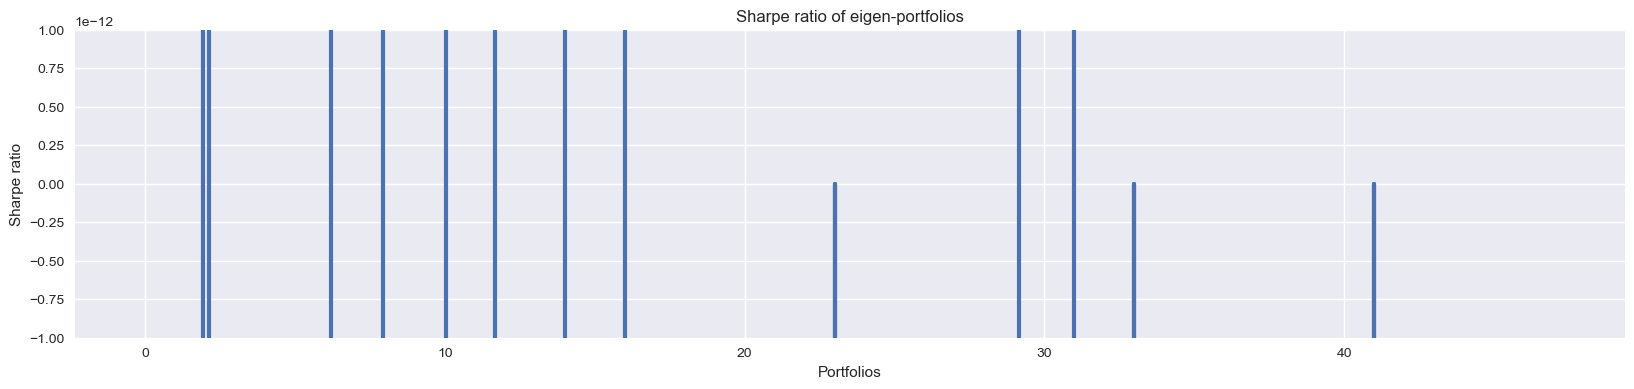

In [38]:
compo_sharpe_graph(Sharpe_Values)


Sum of weights of current eigen-portfolio: weights   100.0000
dtype: float64


,weights
SBIN.NS,3.1474
ICICIBANK.NS,3.0899
TATASTEEL.NS,2.8622
AXISBANK.NS,2.8278
TATAMOTORS.NS,2.8136
JSWSTEEL.NS,2.7368
LT.NS,2.7183
HINDALCO.NS,2.7062
GRASIM.NS,2.6349
BAJFINANCE.NS,2.5776


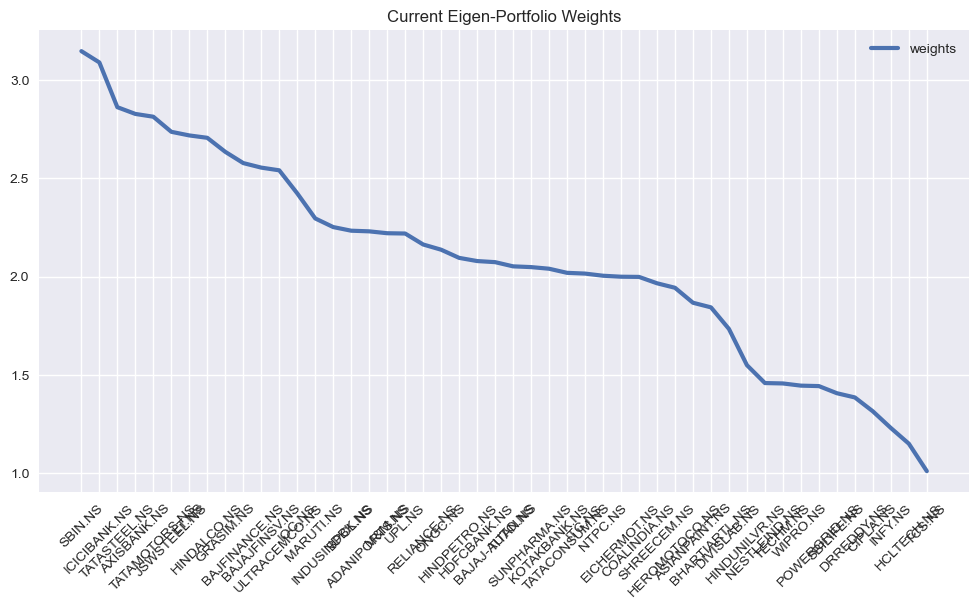

In [39]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of current eigen-portfolio: {}'.format(np.sum(portfolio)))
    portfolio.plot(title='Current Eigen-Portfolio Weights', figsize=(12,6), xticks=range(0, len(stock_tickers),1), rot=45,  linewidth=3)
    
    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0])

# Backtesting

In [40]:
def Backtest(eigen):
    best_sharpe=0
    best_return=0
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
    
    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
    
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))

Equal Weighted-Portfolio:
Return = 18.33%
Volatility = 11.38%
Sharpe = 1.00

Current Eigen-Portfolio with highest Sharpe Ratio:
Return = inf%
Volatility = 28375.84%
Sharpe = inf


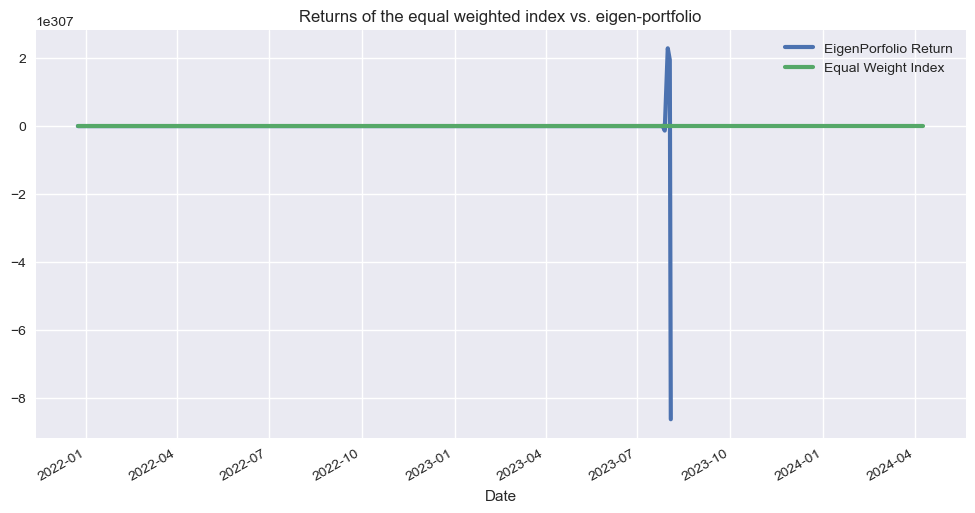

Equal Weighted-Portfolio:
Return = 18.33%
Volatility = 11.38%
Sharpe = 1.00

Current Eigen-Portfolio with highest Return:
Return = inf%
Volatility = 28375.84%
Sharpe = inf


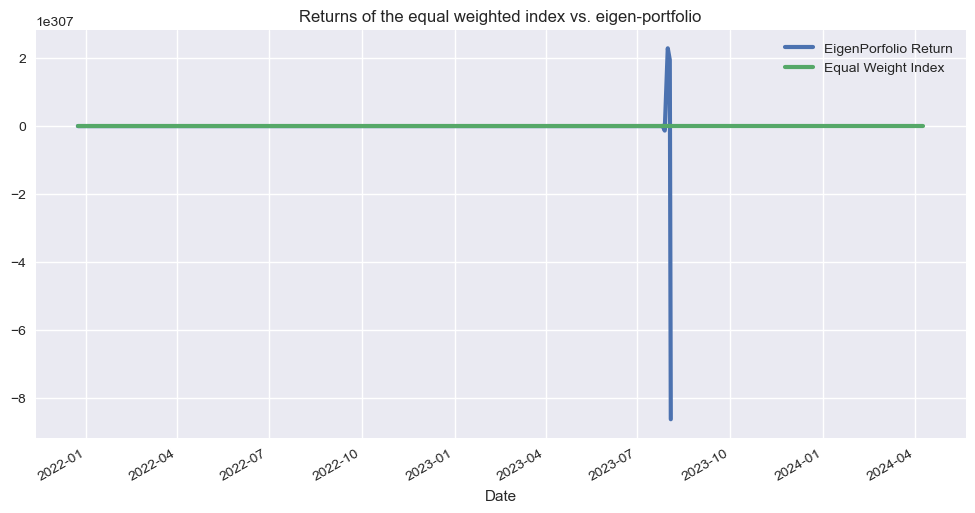

In [41]:
def Backtest(eigen):
    
    Sharpe_Store=[]
    Return_Store=[]
    
    for i in range(0,len(pca.components_)):
        
        eigen_portfolio = pd.DataFrame(data ={'weights': eigen[i]}, index = stock_tickers)
        eigen_portfolio.sort_values(by=['weights'], ascending=False, inplace=True)    

        eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen_portfolio.index], eigen[i])
        eigen_portfolio_returns = pd.Series(eigen_portfolio_returns, index=X_test_raw.index)
        
        returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
        Sharpe_Store.append((sharpe,i))
        Return_Store.append((returns,i))
        #print(i)
    max_sharpe_ind= max(Sharpe_Store)[1]
    max_return_ind= max(Return_Store)[1]
    #print(max_sharpe_ind)
    #print(max_return_ind)
        
        
    #Equal Weighted Index
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)     #Total Daily Return.
    returns_eq, vol_eq, sharpe_eq = Sharpe_Ratio(equal_weight_return)
    
    #Best Sharpe Ratio Portfolio
    best_sharpe_portfolio = pd.DataFrame(data ={'weights': eigen[max_sharpe_ind].squeeze()}, index = stock_tickers)
    best_sharpe_portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    
    best_sharpe_portfolio = np.dot(X_test_raw.loc[:, best_sharpe_portfolio.index], eigen[max_sharpe_ind])
    best_sharpe_portfolio = pd.Series(best_sharpe_portfolio, index=X_test_raw.index)
    returns_s, vol_s, sharpe_s = Sharpe_Ratio(best_sharpe_portfolio)
    
    #Best Return Portfolio
    best_return_portfolio = pd.DataFrame(data ={'weights': eigen[max_return_ind]}, index = stock_tickers)
    best_return_portfolio.sort_values(by=['weights'], ascending=False, inplace=True) 
    
    best_return_portfolio = np.dot(X_test_raw.loc[:, best_return_portfolio.index], eigen[max_return_ind])
    best_return_portfolio = pd.Series(best_return_portfolio, index=X_test_raw.index)
    returns_r, vol_r, sharpe_r = Sharpe_Ratio(best_return_portfolio)

    #eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    #eigen_portfolio_returns = pd.Series(eigen_prti_returns, index=X_test_raw.index)
    #returns, vol, sharpe = Sharpe_Ratio(eigen_portfolio_returns)
    
    print('Equal Weighted-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f\n\nCurrent Eigen-Portfolio with highest Sharpe Ratio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns_eq*100,vol_eq*100,sharpe_eq,returns_s*100, vol_s*100, sharpe_s))
    df_plot = pd.DataFrame({'EigenPorfolio Return': best_sharpe_portfolio, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot+1).plot(title='Returns of the equal weighted index vs. eigen-portfolio',figsize=(12,6), linewidth=3)
    plt.show()
    
    print('Equal Weighted-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f\n\nCurrent Eigen-Portfolio with highest Return:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns_eq*100,vol_eq*100,sharpe_eq,returns_r*100, vol_r*100, sharpe_r))
    df_plot = pd.DataFrame({'EigenPorfolio Return': best_return_portfolio, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot+1).plot(title='Returns of the equal weighted index vs. eigen-portfolio',figsize=(12,6), linewidth=3)
    plt.show()

Backtest(weights)